In [ ]:
import pandas as pd
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter

# Graph Data Reading & Processing

In [ ]:
df = pd.read_csv('mrtJourneys.csv', index_col=0)
df.head()

,0602hr,0604hr,0606hr,0608hr,0610hr,0612hr,0614hr,0616hr,0618hr,0620hr,...,0624hr,0626hr,0628hr,0630hr,0632hr,0634hr,0636hr,0638hr,Gender,Occupation
commuter,,,,,,,,,,,,,,,,,,,,,
1,37,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,politician
2,46,40,34.0,35.0,41.0,47.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,politician
3,36,30,24.0,18.0,12.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,politician
4,5,11,12.0,18.0,24.0,30.0,36.0,42.0,48.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,politician
5,43,49,50.0,44.0,38.0,32.0,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,worker


In [ ]:
df_routes = df.drop(['Gender', 'Occupation'], axis=1)
df_transposed = df_routes.T
df_transposed = df_transposed.fillna(0)

G = nx.Graph()

for commuter in df_transposed.columns:
    for i in range(len(df_transposed[commuter])-1):
        origin_station = int(df_transposed.iloc[i][commuter])
        destination_station = int(df_transposed.iloc[i+1][commuter])

        if (origin_station == 0) | (destination_station == 0):
            break
        
        if G.has_edge(origin_station, destination_station):
            G[origin_station][destination_station]['weight'] += 1

        else:
            G.add_edge(origin_station, destination_station, weight=1)

In [ ]:
A = nx.adjacency_matrix(G, sorted(G.nodes()))
D = np.diag(np.sum(np.array(A.todense()), axis=1))

L = np.asarray(D - A)

In [ ]:
from numpy.linalg import eig

eigenvalues, eigenvectors = eig(L)
indices = np.where(eigenvalues < 1e-5)
eigenvector_filtered = np.take(eigenvectors, list(indices[0]), 1)

eigenvector_filtered

array([[ 0.19240656,  0.0010621 ],
       [ 0.19240656,  0.0010621 ],
       [ 0.19240656,  0.0010621 ],
       [-0.00409295,  0.19244716],
       [-0.00409295,  0.19244716],
       [-0.00409295,  0.19244716],
       [ 0.19240656,  0.0010621 ],
       [ 0.19240656,  0.0010621 ],
       [ 0.19240656,  0.0010621 ],
       [-0.00409295,  0.19244716],
       [-0.00409295,  0.19244716],
       [-0.00409295,  0.19244716],
       [ 0.19240656,  0.0010621 ],
       [ 0.19240656,  0.0010621 ],
       [ 0.19240656,  0.0010621 ],
       [-0.00409295,  0.19244716],
       [-0.00409295,  0.19244716],
       [-0.00409295,  0.19244716],
       [ 0.19240656,  0.0010621 ],
       [ 0.19240656,  0.0010621 ],
       [ 0.19240656,  0.0010621 ],
       [-0.00409295,  0.19244716],
       [-0.00409295,  0.19244716],
       [-0.00409295,  0.19244716],
       [ 0.19240656,  0.0010621 ],
       [ 0.19240656,  0.0010621 ],
       [ 0.19240656,  0.0010621 ],
       [-0.00409295,  0.19244716],
       [-0.00409295,

In [ ]:
# Cluster/Component 1 Stations
cluster1 = np.where(np.array(eigenvector_filtered[:,0].flatten().tolist()) >= 0.19)
cluster1 = [i + 1 for i in cluster1]
cluster1

[array([ 1,  2,  3,  7,  8,  9, 13, 14, 15, 19, 20, 21, 25, 26, 27, 31, 32,
        33, 37, 38, 39, 43, 44, 45, 49, 50, 51])]

In [ ]:
# Cluster/Component 2 Stations
cluster2 = np.where(np.array(eigenvector_filtered[:,1].flatten().tolist()) >= 0.19)
cluster2 = [i + 1 for i in cluster2]
cluster2

[array([ 4,  5,  6, 10, 11, 12, 16, 17, 18, 22, 23, 24, 28, 29, 30, 34, 35,
        36, 40, 41, 42, 46, 47, 48, 52, 53, 54])]

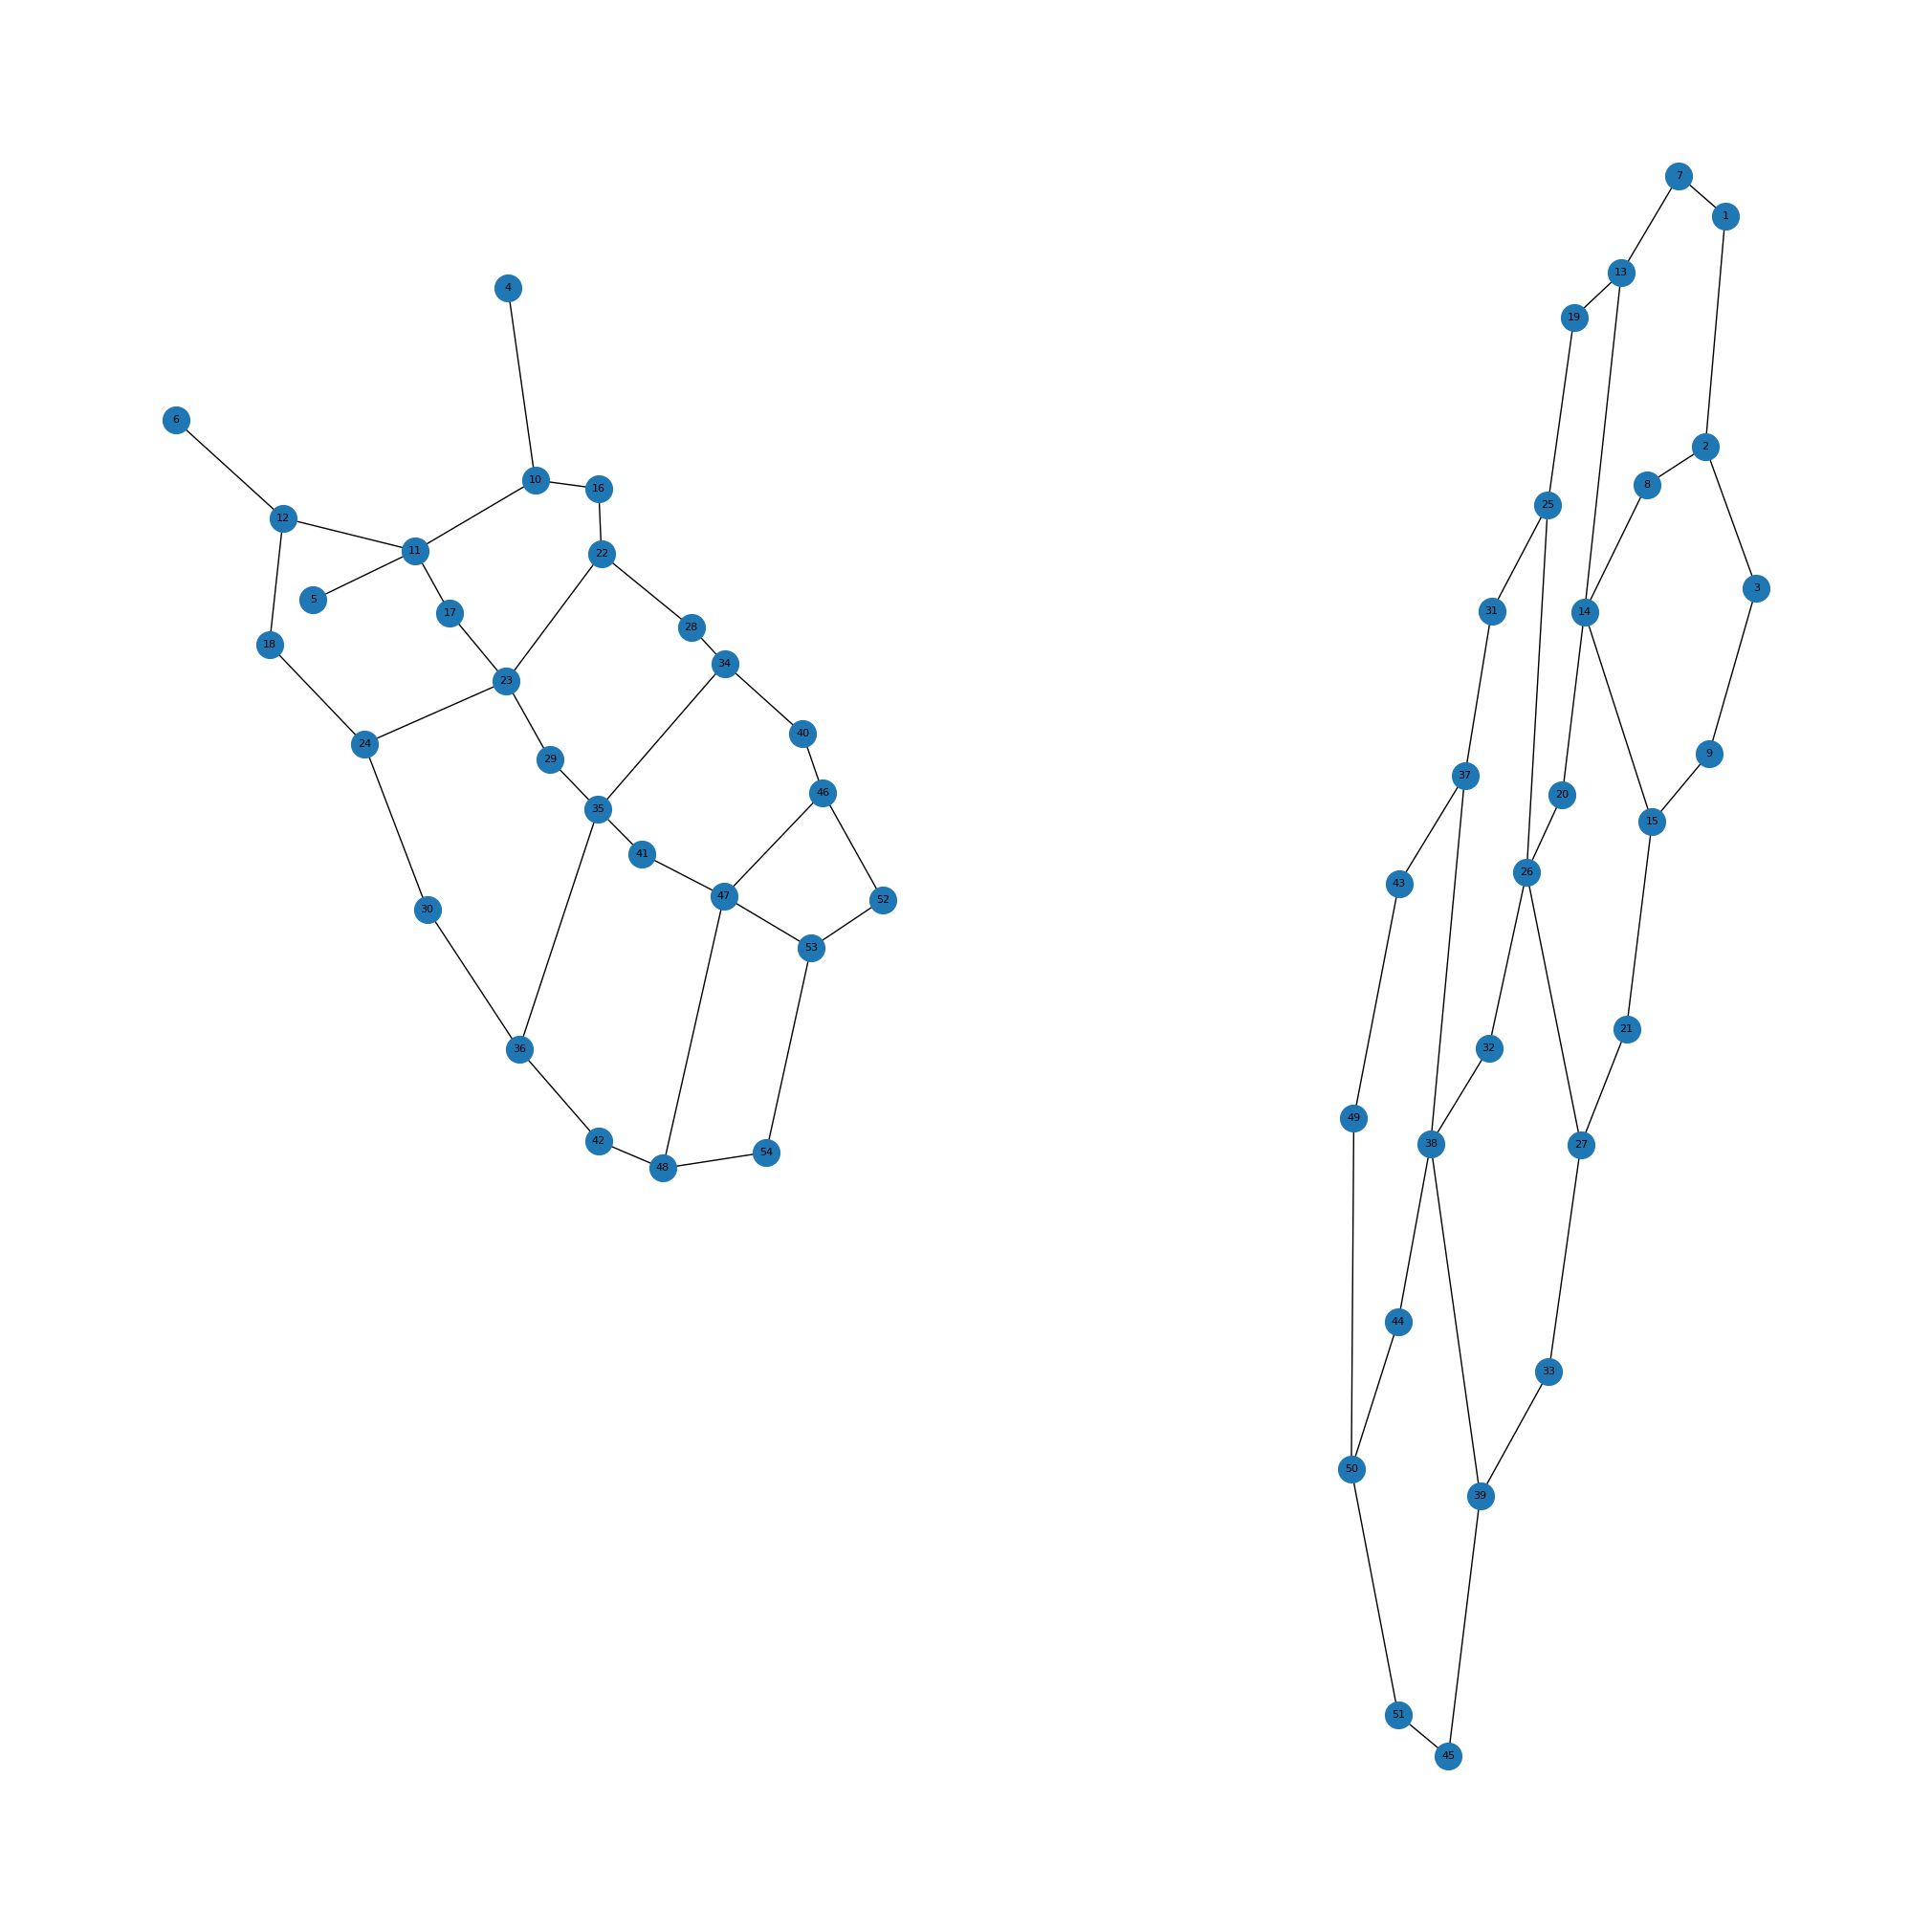

In [ ]:
# Plot the 2 Network Components
plt.figure(3,figsize=(20,20)) 
nx.draw(G, with_labels = True, node_size=400,font_size=8)
plt.show()

# Objective 1: Connectivity of stations 


In [ ]:
idx_cluster1 = [i-1 for i in cluster1]
L_cluster1 = np.delete(np.delete(L, idx_cluster1, 1), idx_cluster1, 0)

stations1 = []
counters1 = []

for i in range(len(cluster1[0])):
    x_cluster1 = np.zeros(len(cluster1[0]))
    np.put(x_cluster1, i, 1)
    counter =0
    while (True):
        x_cluster1 = np.matmul(L_cluster1, x_cluster1)
        counter +=1
        if (x_cluster1.all()):
            break
    counters1.append(counter)
    stations1.append(f"Station {cluster1[0][i]}: {counter}")

stations1

['Station 1: 10',
 'Station 2: 9',
 'Station 3: 10',
 'Station 7: 9',
 'Station 8: 8',
 'Station 9: 9',
 'Station 13: 8',
 'Station 14: 7',
 'Station 15: 8',
 'Station 19: 7',
 'Station 20: 6',
 'Station 21: 7',
 'Station 25: 6',
 'Station 26: 5',
 'Station 27: 6',
 'Station 31: 7',
 'Station 32: 6',
 'Station 33: 7',
 'Station 37: 8',
 'Station 38: 7',
 'Station 39: 8',
 'Station 43: 9',
 'Station 44: 8',
 'Station 45: 9',
 'Station 49: 10',
 'Station 50: 9',
 'Station 51: 10']

In [ ]:
idx_cluster2 = [i-1 for i in cluster2]
L_cluster2 = np.delete(np.delete(L, idx_cluster2, 1), idx_cluster2, 0)

stations2 = []
counters2 = []

for i in range(len(cluster2[0])):
    x_cluster2 = np.zeros(len(cluster2[0]))
    np.put(x_cluster2, i, 1)
    counter =0
    while (True):
        x_cluster2 = np.matmul(L_cluster2, x_cluster2)
        counter +=1
        if (x_cluster2.all()):
            break
    counters2.append(counter)
    stations2.append(f"Station {cluster2[0][i]}: {counter}")

stations2

['Station 4: 10',
 'Station 5: 9',
 'Station 6: 10',
 'Station 10: 9',
 'Station 11: 8',
 'Station 12: 9',
 'Station 16: 8',
 'Station 17: 7',
 'Station 18: 8',
 'Station 22: 7',
 'Station 23: 6',
 'Station 24: 7',
 'Station 28: 6',
 'Station 29: 5',
 'Station 30: 6',
 'Station 34: 7',
 'Station 35: 6',
 'Station 36: 7',
 'Station 40: 8',
 'Station 41: 7',
 'Station 42: 8',
 'Station 46: 9',
 'Station 47: 8',
 'Station 48: 9',
 'Station 52: 10',
 'Station 53: 9',
 'Station 54: 10']

In [ ]:
print(f"Average # Steps from 1 station to reach all stations: {(sum(counters1) + sum(counters2))/ (len(counters1) + len(counters2)) }")

Average # Steps from 1 station to reach all stations: 7.888888888888889


# Objective 2: Congestion

In [ ]:
data = pd.read_csv('mrtJourneys.csv')
columns = data.columns[1:-2].tolist()

<Axes: >

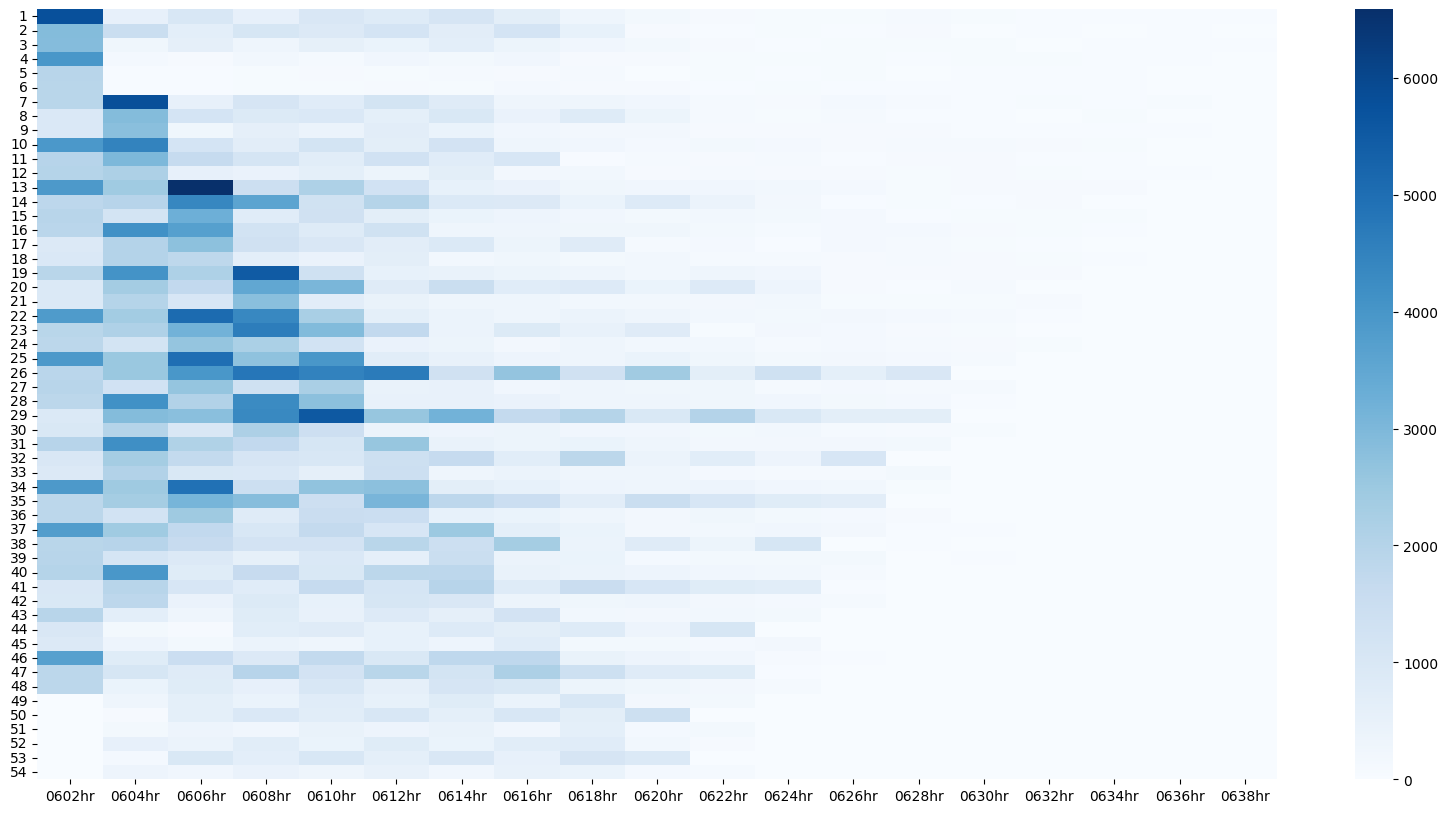

In [ ]:
#Heatmap to visualize the number of commuters at each station for the different timings (Crowd levels in the morning)

data_2 = data.fillna(0)
data_2 = data_2[columns]


station_counts = pd.DataFrame(columns = columns)

for col in data_2.columns: 
    stations_time = data_2[col]
    d = dict(Counter(stations_time))
    if 0 in d.keys():
        del d[0]
    sorted_d = sorted(d.items(), key=lambda x:x[0])
    
    l =  [None] * 54
    for i in (sorted_d): 
        station_number = int(i[0])
        occurences = int(i[1])
        l[station_number - 1] = occurences
    station_counts[col] = l
        
        
station_counts = station_counts.fillna(0)
station_counts.index = [i for i in range(1, 55)]
plt.figure(figsize = (20,10))
sns.heatmap(station_counts, cmap="Blues")

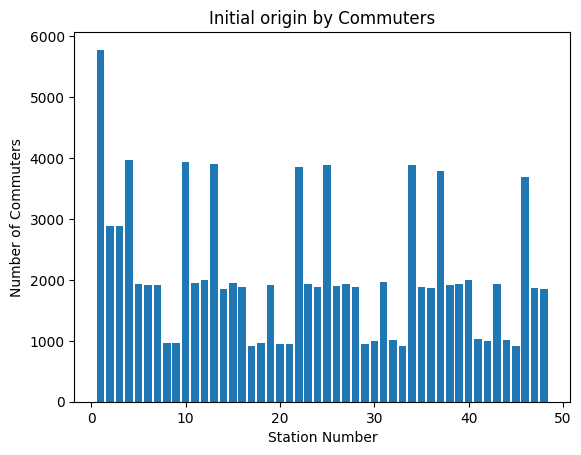

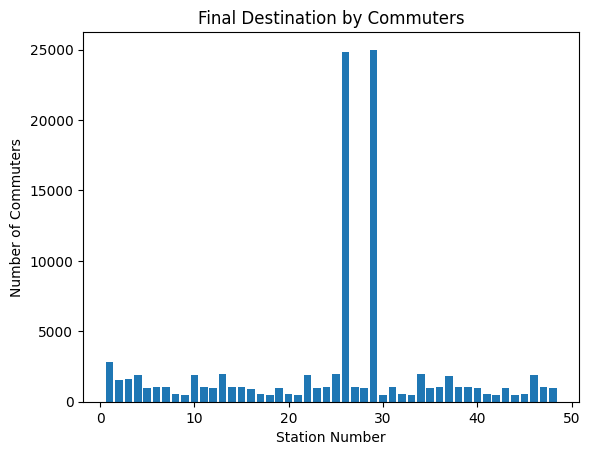

In [ ]:
#Retrieving the origin and destination stations

data_2 = data[columns]
data_2 = data_2.T
origins = {}
destinations = {}

for commuter in data_2.columns:
    
    
    start_hour = data_2[commuter].first_valid_index()
    origin_station = data_2.loc[start_hour,commuter]
    if origin_station  in origins.keys(): 
        origins[origin_station] += 1
    else: 
        origins[origin_station] = 1
        
    end_hour = data_2[commuter].last_valid_index()
    destination_station = int(data_2.loc[end_hour, commuter])
    if destination_station in destinations.keys(): 
        destinations[destination_station] += 1 
    else: 
        destinations[destination_station] = 1 
        
        
origins_df = pd.DataFrame(sorted(origins.items(), key=lambda x:x[1])[::-1]).rename(columns={0: 'Origin',1:'Commuters'})
destinations_df = pd.DataFrame(sorted(destinations.items(), key=lambda x:x[1])[::-1]).rename(columns={0: 'Destination',1:'Commuters'})

plt.title('Initial origin by Commuters')
plt.bar(origins_df.Origin, origins_df.Commuters)
plt.xlabel('Station Number')
plt.ylabel('Number of Commuters') 
plt.show()

plt.title('Final Destination by Commuters')
plt.bar(destinations_df.Destination, destinations_df.Commuters)
plt.xlabel('Station Number')
plt.ylabel('Number of Commuters') 
plt.show()

In [ ]:
origins_df.head(3), destinations_df.head(3)

(   Origin  Commuters
 0     1.0       5778
 1     4.0       3964
 2    10.0       3933,
    Destination  Commuters
 0           29      24996
 1           26      24822
 2            1       2837)

In [ ]:
#Peak time for Each Station 
peak_time_for_stations = {}
for i in range(1, len(station_counts) +1): 
    peak_time_for_stations[i]  =station_counts.loc[i, :].sort_values(ascending=False).head(1).index[0]
data_time = pd.DataFrame.from_dict(peak_time_for_stations, orient='index').reset_index()
data_time[0].value_counts().head(3)

0604hr    13
0602hr    12
0606hr    11
Name: 0, dtype: int64

In [ ]:
#Top 3 timings where the stations had the largest increase in commuters compared to the previous timing
station_counts_frequencies = station_counts.T
stations = set([i for i in range(1, 55)])
station_counts_frequencies = station_counts_frequencies.pct_change()*100
station_counts_frequencies_dict = {}
for station in stations: 
    station_counts_frequencies_dict[station] = station_counts_frequencies[station].sort_values(ascending=False).head(1).index[0]
data_time = pd.DataFrame.from_dict(station_counts_frequencies_dict, orient='index').reset_index()
data_time[0].value_counts().head(3)

0604hr    12
0606hr    11
0608hr    10
Name: 0, dtype: int64

In [ ]:
# % Change in commuters for each station 
station_counts_frequencies

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
0602hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0604hr,-90.481135,-48.094248,-90.729167,-96.215943,-97.669601,-98.076923,203.237598,201.248699,192.468619,14.365624,...,-63.220892,-78.707224,-41.925134,-76.587729,inf,inf,inf,inf,inf,inf
0606hr,87.454545,-56.475300,126.591760,-38.000000,-13.333333,-18.918919,-90.356466,-59.896373,-90.522175,-73.921743,...,-49.112426,89.413265,-24.953959,78.620690,98.717949,689.873418,99.421965,-30.035336,567.567568,-29.360465
0608hr,-46.750727,66.104294,-50.413223,148.387097,92.307692,133.333333,101.428571,-24.461671,123.773585,-38.789429,...,136.046512,-37.777778,140.368098,-29.987130,-31.612903,53.205128,-29.275362,87.878788,-34.210526,80.658436
0610hr,84.881603,-15.050785,91.666667,-48.051948,12.000000,-4.285714,-32.358156,9.464082,-31.703204,65.181058,...,-24.384236,86.255411,-37.774375,90.992647,76.179245,-23.117155,92.213115,-43.010753,61.846154,-30.523918
0612hr,-18.817734,26.304348,-25.913043,105.833333,-11.904762,31.343284,55.176933,-35.312500,75.555556,-41.483980,...,73.615635,-41.778036,58.244463,-42.733397,-29.986613,40.272109,-25.799574,82.547170,-41.064639,63.606557
0614hr,34.344660,-38.812392,53.286385,-32.388664,70.270270,-17.045455,-32.179054,58.615137,-39.943741,77.377522,...,-34.521576,77.844311,-37.895283,89.747899,48.565966,-39.767216,39.942529,-44.702842,63.387097,-49.098196
0616hr,-38.934056,65.822785,-44.410413,52.095808,-22.222222,105.479452,-60.896638,-53.807107,-43.091335,-74.004874,...,114.899713,-0.280584,80.717863,-12.843224,-44.658945,66.827697,-48.254620,74.299065,-44.422507,100.000000
0618hr,-55.917160,-55.640373,-31.955923,-61.417323,14.285714,-41.333333,-5.414013,84.175824,-16.049383,-21.875000,...,-79.066667,-73.157006,-35.011547,-61.585366,144.883721,-34.749035,152.380952,2.144772,100.355240,-18.700787
0620hr,-40.939597,-81.835564,-32.793522,-6.122449,-83.035714,-7.954545,-18.518519,-54.176611,0.490196,-46.800000,...,6.369427,-27.253669,-42.714996,-30.423280,-80.721747,108.431953,-79.716981,-71.259843,-15.602837,-64.406780


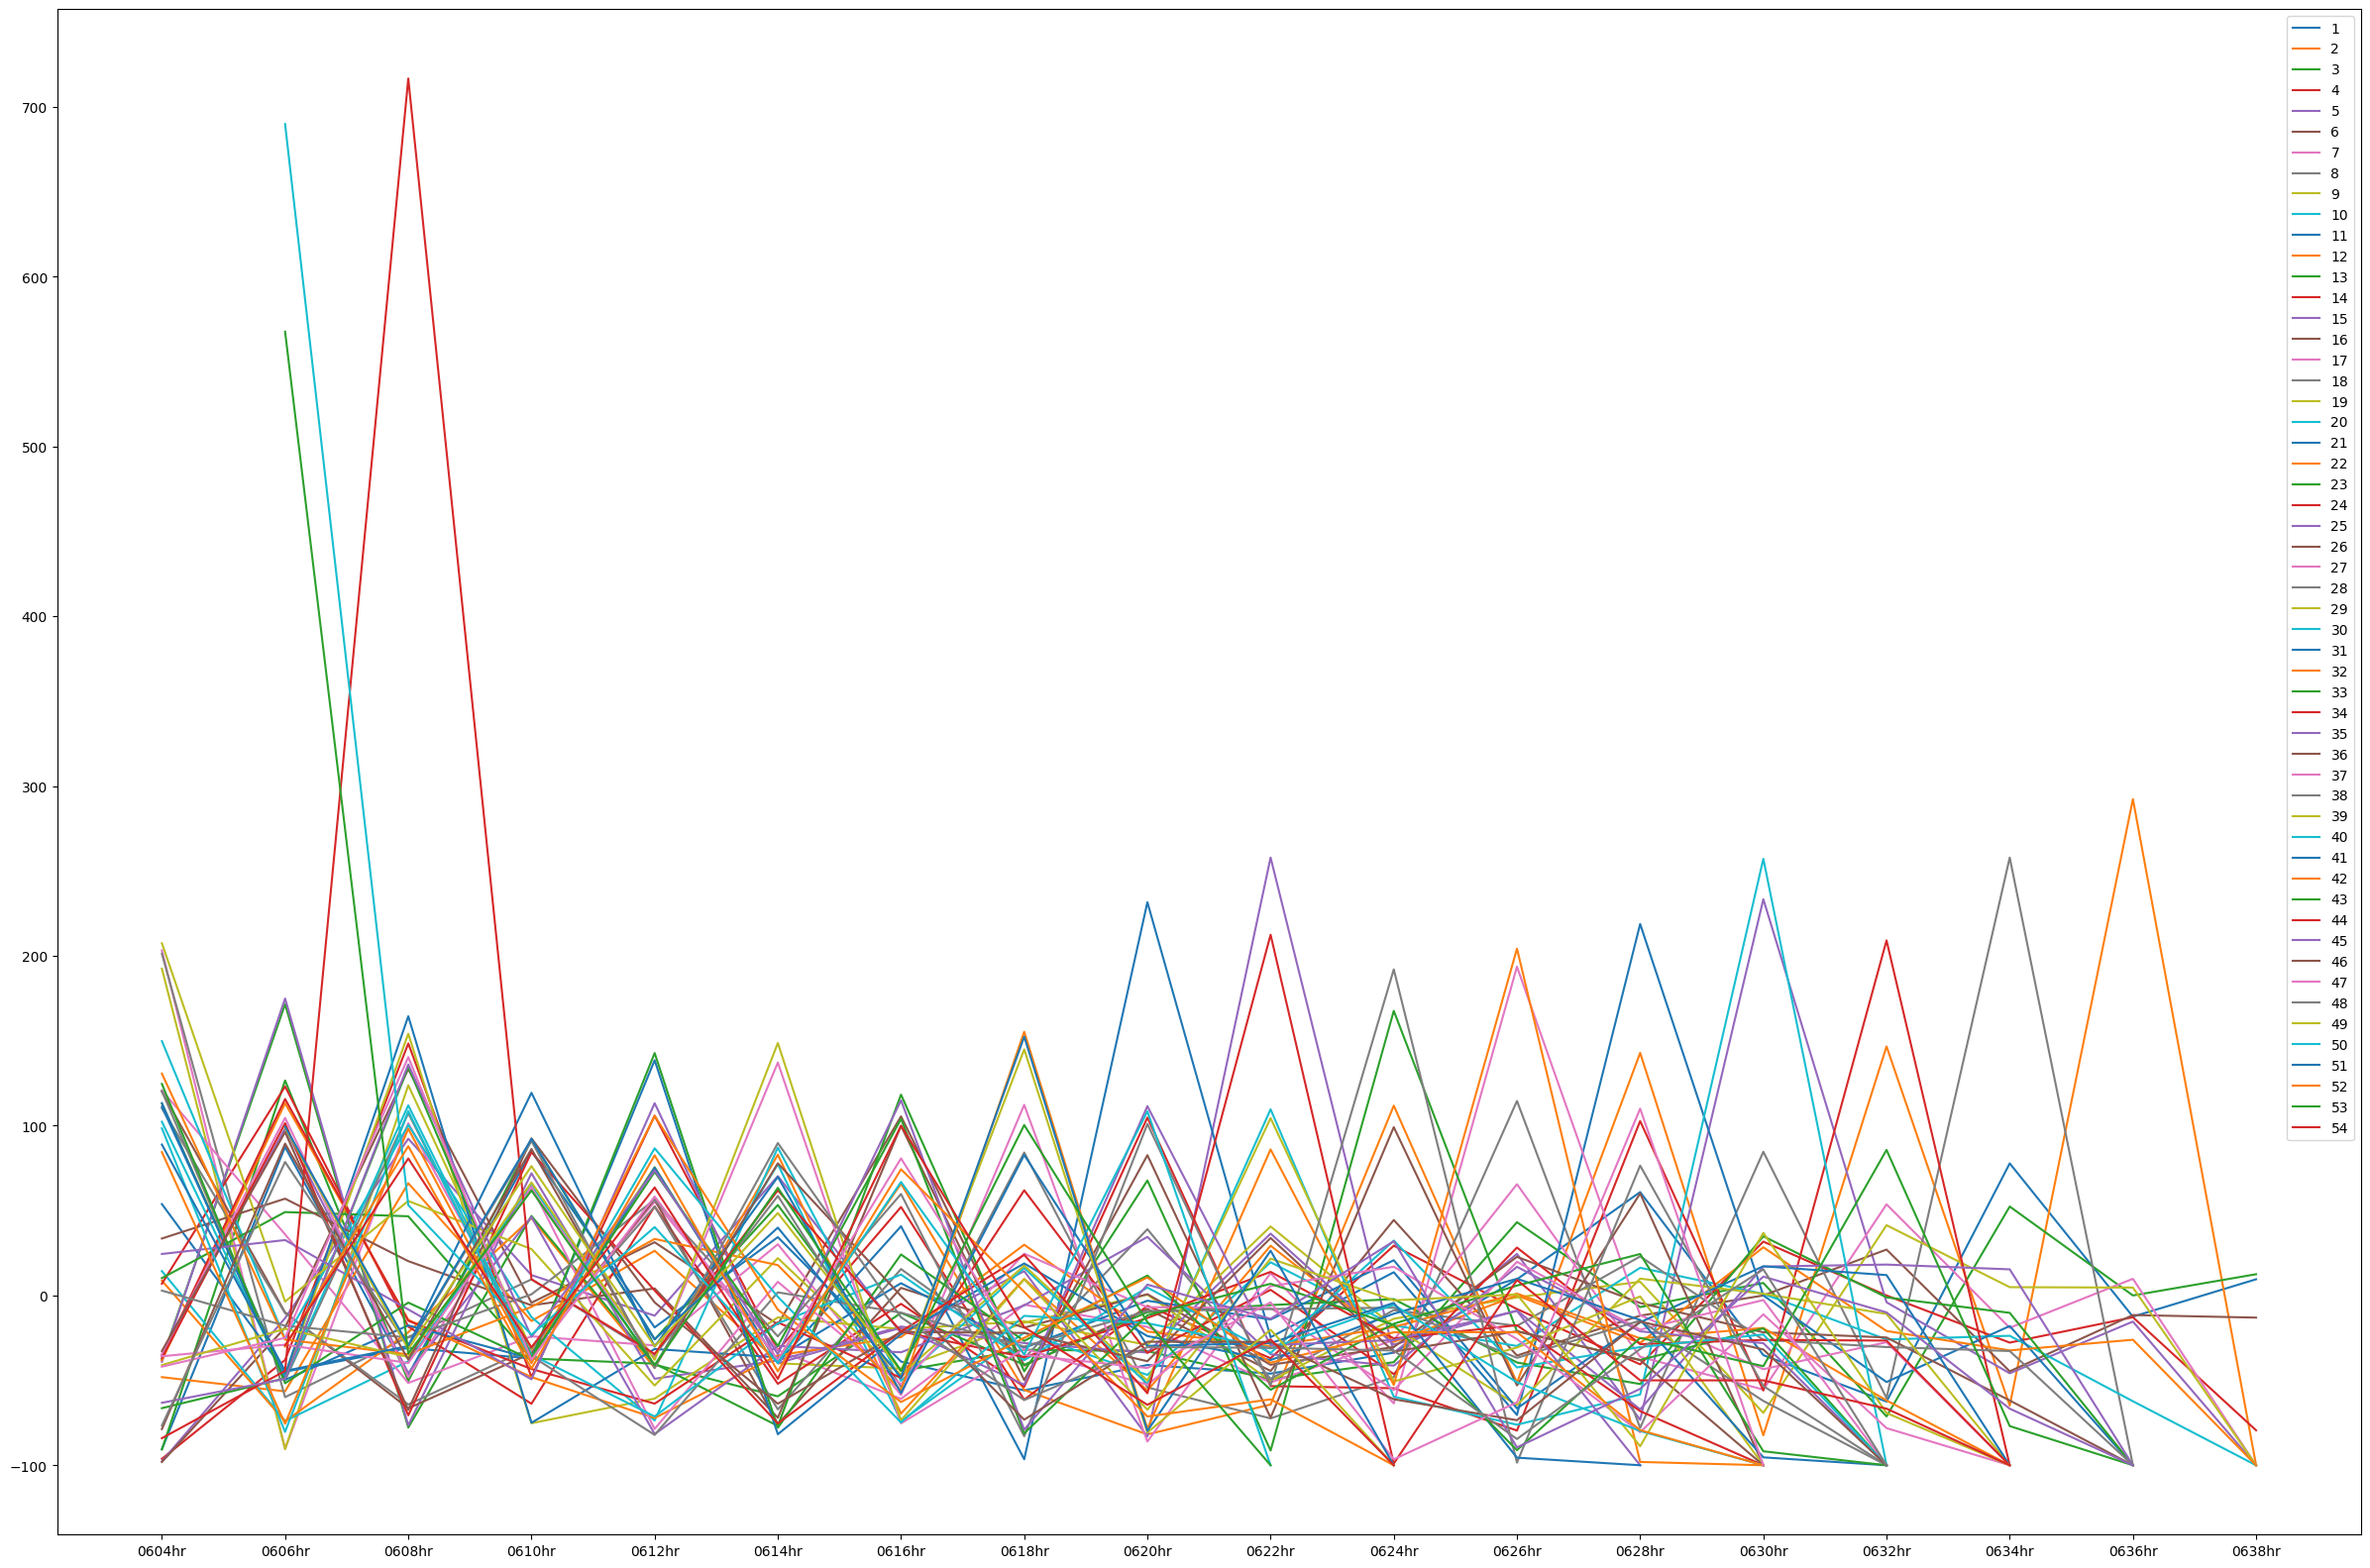

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(station_counts_frequencies, label = station_counts_frequencies.columns)
plt.legend()
plt.show()

In [ ]:
#Top 3 timings where the most number of stations witnessed the largest % change in commuters
station_counts_frequencies.replace([np.inf, -np.inf], 0, inplace=True)
timings = dict() 
for station in stations: 
    timings[station] = station_counts_frequencies.loc[:, station].sort_values(ascending=False).head(1).index[0]
pd.DataFrame.from_dict(timings, orient='index').reset_index()[0].value_counts().head(3)

0606hr    13
0608hr    11
0604hr     6
Name: 0, dtype: int64

In [ ]:
data = data.fillna(0)

#Stations not visited at all for each interval
stations_notvisited_total = []
stations = set([i for i in range(1, 55)])

notvisited_stations = pd.DataFrame(columns = columns).astype(object)
for col in columns: 
    mrt_stations_not_visited_at_each_hour = []
    extracted_df = set(data.loc[:, col].value_counts().index.tolist())
    mrt_stations_not_visited_at_each_hour = list(set(stations) - set(extracted_df))
    notvisited_stations.loc[0, col] =  mrt_stations_not_visited_at_each_hour
    notvisited_stations.loc['Number of stations not visited', col] = len(mrt_stations_not_visited_at_each_hour)
    for station in mrt_stations_not_visited_at_each_hour: 
        stations_notvisited_total.append(station)
notvisited_stations

,0602hr,0604hr,0606hr,0608hr,0610hr,0612hr,0614hr,0616hr,0618hr,0620hr,0622hr,0624hr,0626hr,0628hr,0630hr,0632hr,0634hr,0636hr,0638hr
0,"[49, 50, 51, 52, 53, 54]",[],[],[],[],[],[],[],[],[],"[50, 53]","[49, 50, 51, 52, 53, 54]","[49, 50, 51, 52, 53, 54]","[35, 41, 49, 50, 51, 52, 53, 54]","[32, 34, 35, 36, 40, 41, 42, 47, 49, 50, 51, 5...","[20, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...","[14, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2...","[8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22...","[2, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
Number of stations not visited,6,0,0,0,0,0,0,0,0,0,2,6,6,8,16,27,36,44,50


# Objective 3: Service Reliability 

In [ ]:
# Calculate betweenness centrality for each station
betweenness_centrality = nx.betweenness_centrality(G)

# Sort the stations by betweenness centrality
sorted_stations = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)

In [ ]:
# Print the top 5 stations with the highest betweenness centrality
print("Top 5 Stations by Betweenness Centrality:")
print(sorted_stations[:5])

Top 10 Stations by Betweenness Centrality:
[(26, 0.07672955974842767), (23, 0.07252056119980647), (35, 0.07184325108853412), (14, 0.0610546686018384), (38, 0.06105466860183838), (27, 0.04833091436865021), (25, 0.0483309143686502), (24, 0.04581519109820996), (22, 0.04581519109820995), (34, 0.0451862602805999)]


In [ ]:
print("Average Betweenness Centrality of the Station")
print(sum([b[1] for b in sorted_stations]) / len(sorted_stations))

Average Betweenness Centrality of the Station
0.028946944041283666


# Objective 4: Station Amenities

<Axes: >

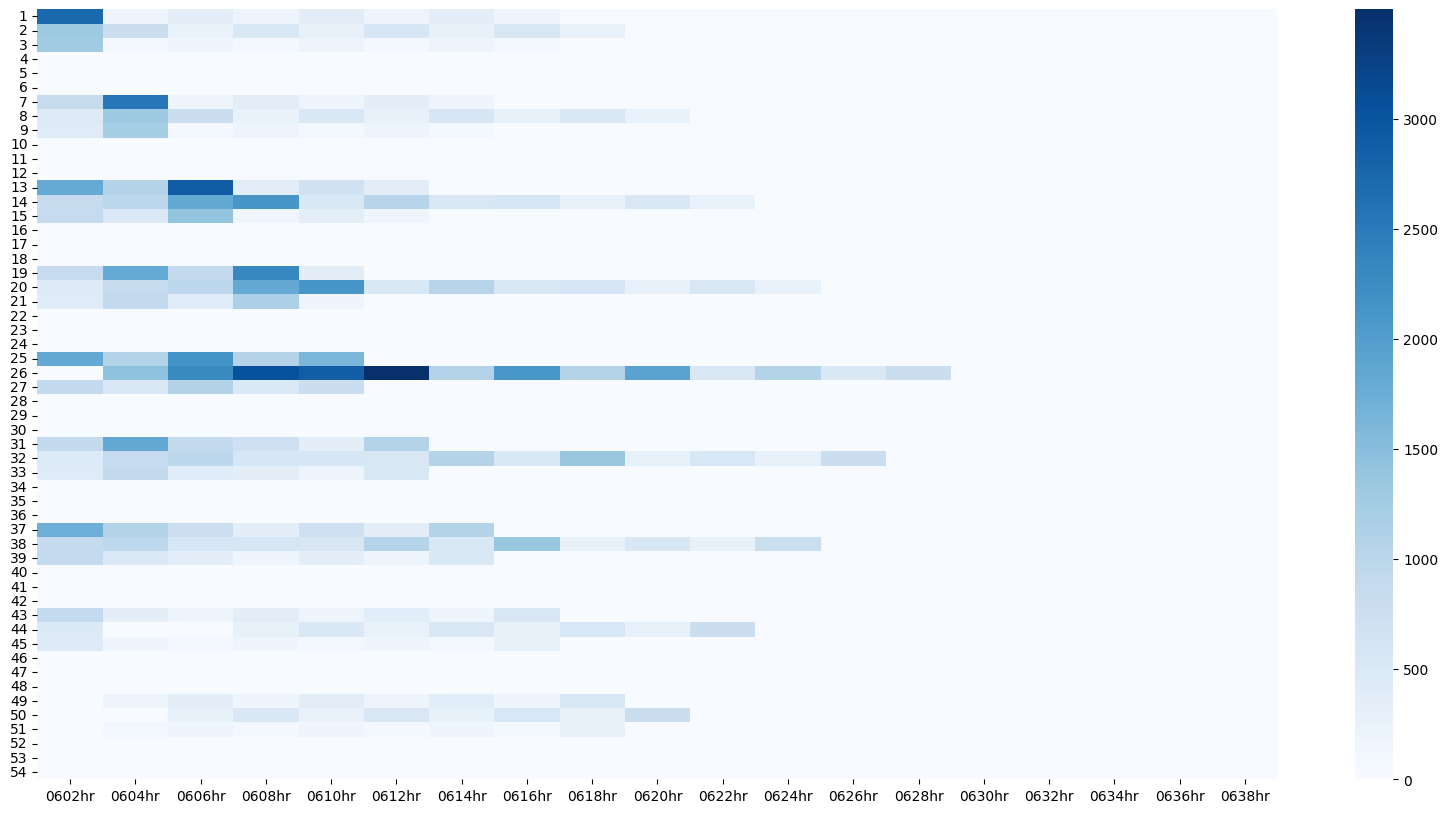

In [ ]:
#Most commonly visited stations by Occupation

#Student
student_condition = data['Occupation'] == 'student'
student_df = data.loc[student_condition].reset_index(drop=True)[columns]


station_counts = pd.DataFrame(columns = columns)

for col in student_df.columns: 
    stations_time = student_df[col]
    d = dict(Counter(stations_time))
    if 0 in d.keys():
        del d[0]
    sorted_d = sorted(d.items(), key=lambda x:x[0])
    
    l =  [None] * 54
    for i in (sorted_d): 
        station_number = int(i[0])
        occurences = int(i[1])
        l[station_number - 1] = occurences
    station_counts[col] = l
        
        
station_counts = station_counts.fillna(0)
station_counts.index = [i for i in range(1, 55)]
plt.figure(figsize = (20,10))
sns.heatmap(station_counts, cmap="Blues")

In [ ]:
station_counts = station_counts.fillna(0)
station_counts.index = [i for i in range(1, 55)]
station_counts.sum(axis=1).sort_values(ascending=False).head()

26    22306.0
20    10010.0
14     9562.0
32     8853.0
38     8389.0
dtype: float64

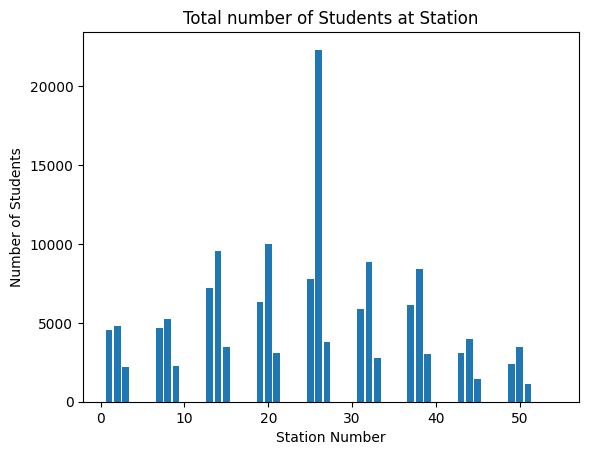

In [ ]:
station_counts = station_counts.sum(axis=1)
plt.title('Total number of Students at Station')
plt.bar(station_counts.index, station_counts.values)
plt.xlabel('Station Number')
plt.ylabel('Number of Students') 
plt.show()

<Axes: >

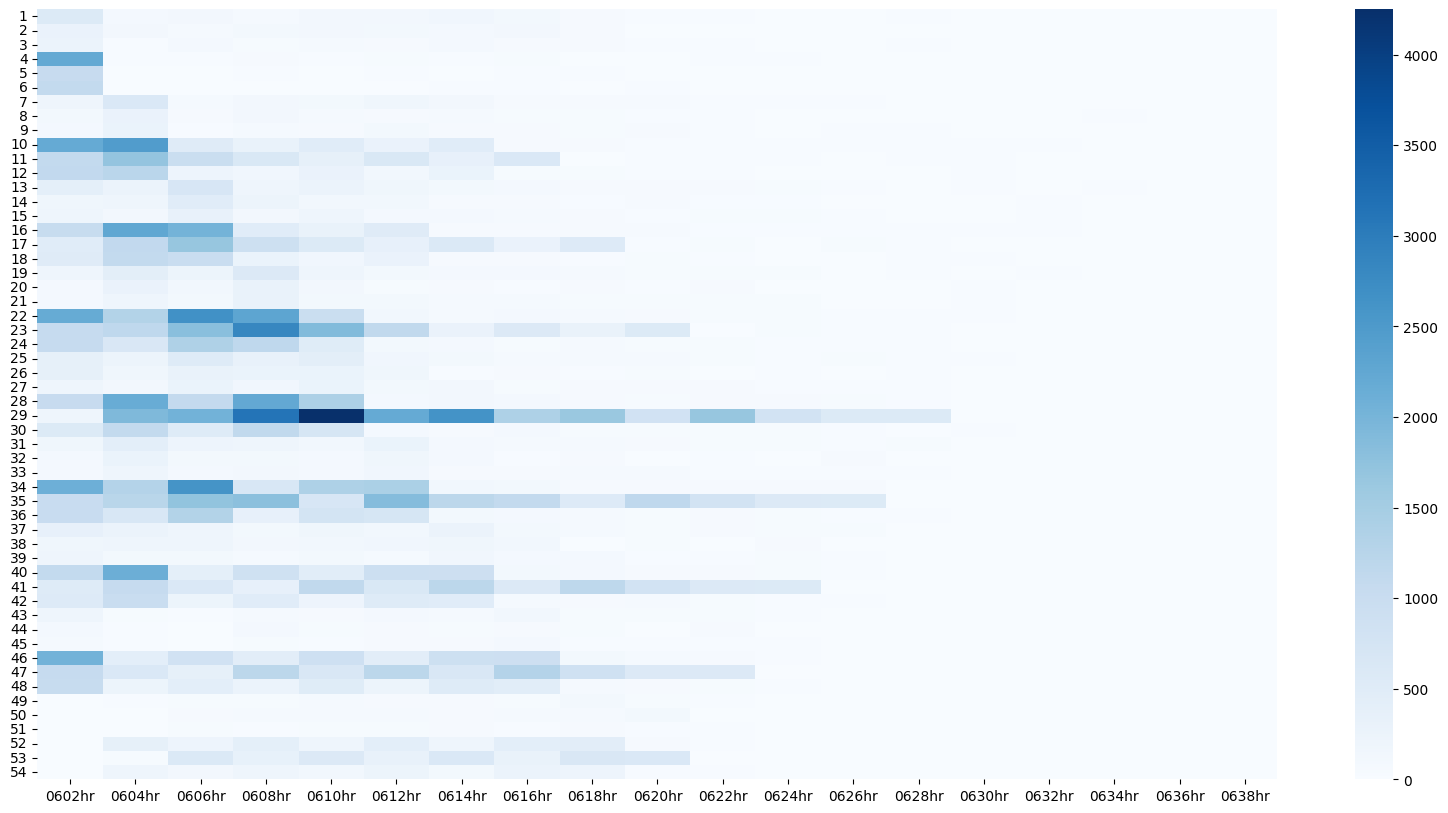

In [ ]:
#Politician
politician_condition = data['Occupation'] == 'politician'
politician_df = data.loc[politician_condition].reset_index(drop=True)[columns]


station_counts = pd.DataFrame(columns = columns)

for col in politician_df.columns: 
    stations_time = politician_df[col]
    d = dict(Counter(stations_time))
    if 0 in d.keys():
        del d[0]
    sorted_d = sorted(d.items(), key=lambda x:x[0])
    if len(sorted_d) == 0: 
        continue
    l =  [None] * 54
    for i in (sorted_d): 
        import math 
        if math.isnan(i[0]): 
            station_number = 0
        else:
            station_number = int(i[0])
        occurences = int(i[1])
        l[station_number - 1] = occurences
    station_counts[col] = l
        
        
station_counts = station_counts.fillna(0)
station_counts.index = [i for i in range(1, 55)]
plt.figure(figsize = (20,10))
sns.heatmap(station_counts, cmap="Blues")

In [ ]:
station_counts = station_counts.fillna(0)
station_counts.index = [i for i in range(1, 55)]
station_counts.sum(axis=1).sort_values(ascending=False).head()

29    23833.0
35    14322.0
23    11778.0
34    10071.0
22    10054.0
dtype: float64

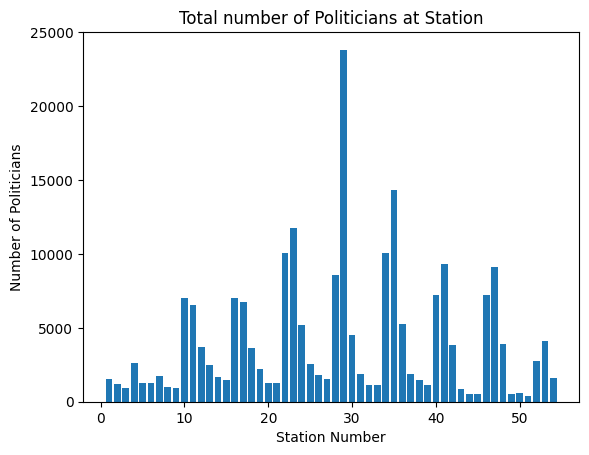

In [ ]:
station_counts = station_counts.sum(axis=1)
plt.title('Total number of Politicians at Station')
plt.bar(station_counts.index, station_counts.values)
plt.xlabel('Station Number')
plt.ylabel('Number of Politicians') 
plt.show()

<Axes: >

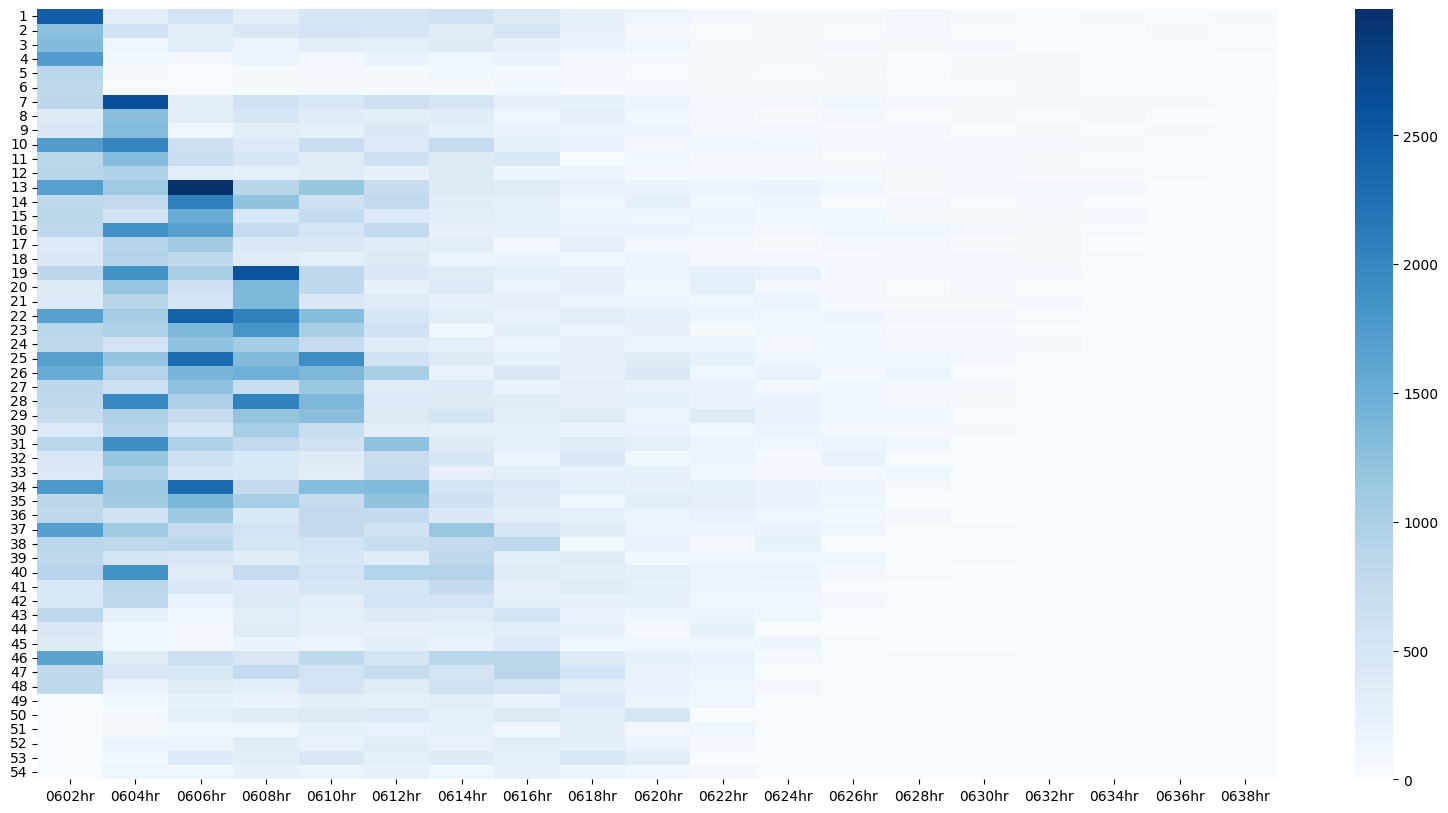

In [ ]:
#Worker

worker_condition = data['Occupation'] == 'worker'
workers_df = data.loc[worker_condition].reset_index(drop=True)[columns]


station_counts = pd.DataFrame(columns = columns)

for col in workers_df.columns: 
    stations_time = workers_df[col]
    d = dict(Counter(stations_time))
    if 0 in d.keys():
        del d[0]
    sorted_d = sorted(d.items(), key=lambda x:x[0])
    if len(sorted_d) == 0: 
        continue
    l =  [None] * 54
    for i in (sorted_d): 
        import math 
        if math.isnan(i[0]): 
            station_number = 0
        else:
            station_number = int(i[0])
        occurences = int(i[1])
        l[station_number - 1] = occurences
    station_counts[col] = l
        
        
station_counts = station_counts.fillna(0)
station_counts.index = [i for i in range(1, 55)]
plt.figure(figsize = (20,10))
sns.heatmap(station_counts, cmap="Blues")

In [ ]:
station_counts = station_counts.fillna(0)
station_counts.index = [i for i in range(1, 55)]
station_counts.sum(axis=1).sort_values(ascending=False).head()

25    11049.0
22    10831.0
34    10802.0
13    10502.0
26     9624.0
dtype: float64

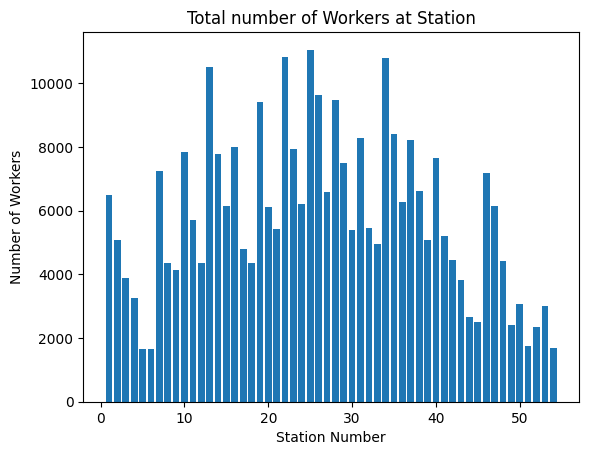

In [ ]:
station_counts = station_counts.sum(axis=1)
plt.title('Total number of Workers at Station')
plt.bar(station_counts.index, station_counts.values)
plt.xlabel('Station Number')
plt.ylabel('Number of Workers') 
plt.show()

In [ ]:
#Origin and Destination for Commuters, grouped by Occupation

#Student
data = pd.read_csv('mrtJourneys.csv')
condition = data.loc[:, 'Occupation'] == 'student'
student_df = data.loc[condition].reset_index(drop=True)
student_df = student_df.drop(['Gender', 'Occupation', 'commuter'], axis=1)
student_df = student_df.T
student_destinations = {}
for commuter in student_df.columns:
   
    start_hour = student_df[commuter].first_valid_index()
    end_hour = student_df[commuter].last_valid_index()
    origin_station = student_df.loc[start_hour,commuter]
    destination_station = student_df.loc[end_hour, commuter]
    if destination_station  in student_destinations.keys(): 
        student_destinations[destination_station] += 1
    else: 
        student_destinations[destination_station] = 1

        
student_destination_df = pd.DataFrame(sorted(student_destinations.items(), key=lambda x:x[1])[::-1]).rename(columns={0: 'Destination',1:'Number_of_students'})
student_destination_df

,Destination,Number_of_students
0,26.0,22306


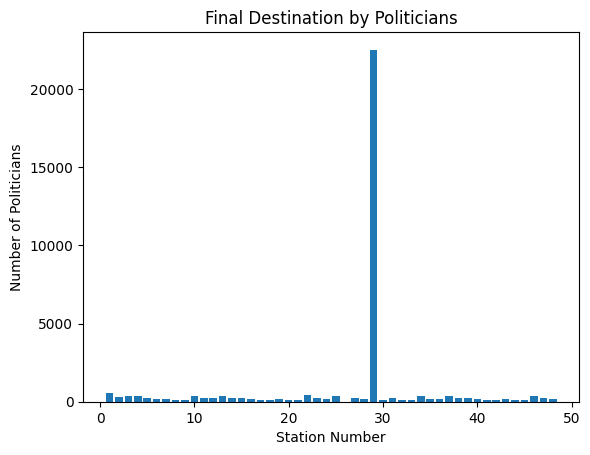

In [ ]:
#Politician
condition = data.loc[:, 'Occupation'] == 'politician'
politician_df = data.loc[condition].reset_index(drop=True)
politician_df = politician_df.drop(['Gender', 'Occupation', 'commuter'], axis=1)
politician_df = politician_df.T
politician_destinations = {}
politician_origin = {}
for commuter in politician_df.columns:
   
    start_hour = politician_df[commuter].first_valid_index()
    end_hour = politician_df[commuter].last_valid_index()
    origin_station = politician_df.loc[start_hour,commuter]
    destination_station = politician_df.loc[end_hour, commuter]
    if destination_station  in politician_destinations.keys(): 
        politician_destinations[destination_station] += 1
    else: 
        politician_destinations[destination_station] = 1
        
    if origin_station  in politician_origin.keys(): 
        politician_origin[origin_station] += 1
    else: 
        politician_origin[origin_station] = 1
        
        
politician_destination_df = pd.DataFrame(sorted(politician_destinations.items(), key=lambda x:x[1])[::-1]).rename(columns={0: 'Destination',1:'Number_of_Politicians'})
plt.title('Final Destination by Politicians')
plt.bar(politician_destination_df.Destination, politician_destination_df.Number_of_Politicians)
plt.xlabel('Station Number')
plt.ylabel('Number of Politicians') 
plt.show()

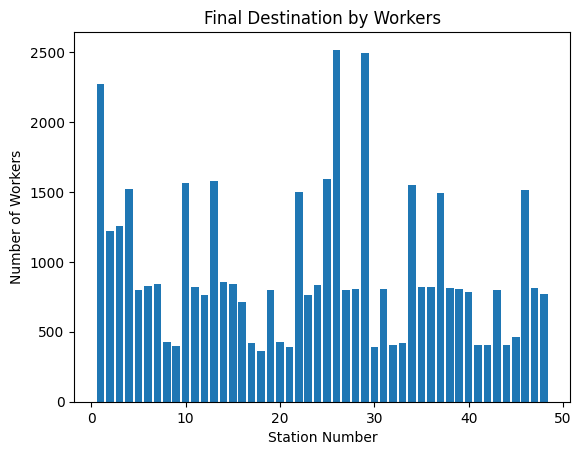

In [ ]:
#Worker
condition = data.loc[:, 'Occupation'] == 'worker'
worker_df = data.loc[condition].reset_index(drop=True)
worker_df = worker_df.drop(['Gender', 'Occupation', 'commuter'], axis=1)
worker_df = worker_df.T
worker_destinations = {}
for commuter in worker_df.columns:
   
    start_hour = worker_df[commuter].first_valid_index()
    end_hour = worker_df[commuter].last_valid_index()
    origin_station = worker_df.loc[start_hour,commuter]
    destination_station = worker_df.loc[end_hour, commuter]
    if destination_station  in worker_destinations.keys(): 
        worker_destinations[destination_station] += 1
    else: 
        worker_destinations[destination_station] = 1

worker_destination_df = pd.DataFrame(sorted(worker_destinations.items(), key=lambda x:x[1])[::-1]).rename(columns={0: 'Destination',1:'Number_of_Workers'})
plt.title('Final Destination by Workers')
plt.bar(worker_destination_df.Destination, worker_destination_df.Number_of_Workers)
plt.xlabel('Station Number')
sns.set(font_scale=1)

plt.ylabel('Number of Workers') 
plt.show()

# Objective 5: Passenger Navigation

In [ ]:
non_optimal_travelling = []
non_optimal_origin = []
non_optimal_destinations = []

for commuter in df_transposed.columns:
   
    start_hour = df_transposed[commuter].first_valid_index()
    end_hour = df_transposed.index[df_transposed[commuter].to_numpy().nonzero()[0][-1]]
    origin_station = int(df_transposed.loc[start_hour,commuter])
    destination_station = int(df_transposed.loc[end_hour, commuter])

    shortest_path = nx.shortest_path(G, origin_station, destination_station)
    path_travelled = np.array(np.trim_zeros(df_transposed.loc[:, commuter]), dtype= np.intc).tolist()

    if (path_travelled != shortest_path) & (len(path_travelled) > len(shortest_path)):
        non_optimal_travelling.append(commuter)  
        non_optimal_destinations.append(origin_station)
        non_optimal_destinations.append(destination_station)

In [ ]:
print(f"Percentage of Passengers Using Sub-Optimal Route: {len(non_optimal_travelling) / len(df) * 100}%")

Percentage of Passengers Using Sub-Optimal Route: 44.432%


In [ ]:
passenger_num = 2

start_hour = df_transposed[2].first_valid_index()
end_hour = df_transposed.index[df_transposed[passenger_num].to_numpy().nonzero()[0][-1]]
origin_station = int(df_transposed.loc[start_hour,passenger_num])
destination_station = int(df_transposed.loc[end_hour, passenger_num])

shortest_path = nx.shortest_path(G, origin_station, destination_station)
path_travelled = np.array(np.trim_zeros(df_transposed.loc[:, passenger_num]), dtype= np.intc).tolist()

print(f"Example of an Sub-optimal Route taken for Passenger {passenger_num} ")
print(f"shortest path = {shortest_path}")
print(f"actual path = {path_travelled}")

Example of an Sub-optimal Route taken for Passenger 2 
shortest path = [46, 47]
actual path = [46, 40, 34, 35, 41, 47]
